### Exploring The Kaggle Training Data Distribution

This notebook explores the given kaggle datalabels and the what a reasonable
train/test set might look like.

Ultimately we want to generate samples with the following columns:

- id (unique string/int id)
- text (the flattened reasonably cleaned text, will be loaded at runtime)
- label (the pipe (`|`) delimited list of labels)

In [1]:
import pandas as pd

In [5]:
kaggle_labels = pd.read_csv("../data/kaggle/train.csv")
kaggle_labels.describe()

,Id,pub_title,dataset_title,dataset_label,cleaned_label
count,19661,19661,19661,19661,19661
unique,14316,14271,45,130,130
top,170113f9-399c-489e-ab53-2faf5c64c5bc,Science and Engineering Indicators 2014,Alzheimer's Disease Neuroimaging Initiative (A...,ADNI,adni
freq,22,22,6144,3673,3673


In [6]:
kaggle_labels.head()

,Id,pub_title,dataset_title,dataset_label,cleaned_label
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study


Let's use the `dataset_label`. Clean label gets rid of non-alphanumeric chacters like `',()` which may not be helpful

In [4]:
kaggle_labels.loc[kaggle_labels.duplicated(subset=["Id"], keep=False)]

,Id,pub_title,dataset_title,dataset_label,cleaned_label
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
...,...,...,...,...,...
19614,9eb497e4-a143-4f4f-b000-a9d4ff94e425,"Update of the current knowledge on genetics, e...",SARS-CoV-2 genome sequence,genome sequences of 2019-nCoV,genome sequences of 2019 ncov
19653,922a5f2c-2d1c-46a7-a07a-acaf2222c0c6,3D U-Net for segmentation of COVID-19 associat...,RSNA International COVID-19 Open Radiology Dat...,RSNA International COVID-19 Open Radiology Dat...,rsna international covid 19 open radiology dat...
19655,922a5f2c-2d1c-46a7-a07a-acaf2222c0c6,3D U-Net for segmentation of COVID-19 associat...,RSNA International COVID-19 Open Radiology Dat...,RSNA International COVID-19 Open Radiology Dat...,rsna international covid 19 open radiology dat...
19659,fd23e7e0-a5d2-4f98-992d-9209c85153bb,A ligand-based computational drug repurposing ...,CAS COVID-19 antiviral candidate compounds dat...,CAS COVID-19 antiviral candidate compounds dat...,cas covid 19 antiviral candidate compounds dat...


It seems like CSV have a single dataset per document, with documents that contain multiple datasets having multiple rows assosciated with their id. These need to be aggregated into a single row per document as `id` should be a unique column.

In [10]:
kaggle_dataset = pd.DataFrame({"id": kaggle_labels["Id"].unique()})

,id
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b
1,2f26f645-3dec-485d-b68d-f013c9e05e60
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af
4,c754dec7-c5a3-4337-9892-c02158475064
...,...
14311,f89dd9fa-07af-4384-aa0c-0d14602c0cea
14312,b3498176-8832-4033-aea6-b5ea85ea04c4
14313,f77eb51f-c3ac-420b-9586-cb187849c321
14314,ab59bcdd-7b7c-4107-93f5-0ccaf749236c


In [32]:
def aggregate_clean_label(row: pd.DataFrame):
    labels = list(map(lambda x: x.lower().strip(), row["dataset_label"].unique()))
    return "|".join(labels)

unique_labels = kaggle_labels.groupby("Id").apply(aggregate_clean_label)

In [39]:
kaggle_dataset["label"] = kaggle_dataset["id"].apply(lambda x: unique_labels[x])
kaggle_dataset

,id,label
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,national education longitudinal study|educatio...
1,2f26f645-3dec-485d-b68d-f013c9e05e60,national education longitudinal study|educatio...
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,national education longitudinal study|educatio...
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,national education longitudinal study|educatio...
4,c754dec7-c5a3-4337-9892-c02158475064,national education longitudinal study|educatio...
...,...,...
14311,f89dd9fa-07af-4384-aa0c-0d14602c0cea,rsna international covid-19 open radiology dat...
14312,b3498176-8832-4033-aea6-b5ea85ea04c4,rsna international covid open radiology database
14313,f77eb51f-c3ac-420b-9586-cb187849c321,cas covid-19 antiviral candidate compounds dat...
14314,ab59bcdd-7b7c-4107-93f5-0ccaf749236c,cas covid-19 antiviral candidate compounds dat...


In [44]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(kaggle_dataset, test_size=0.2, random_state=42)

In [47]:
train_labels = train_df["label"].str.get_dummies(sep="|")
test_labels = test_df["label"].str.get_dummies(sep="|")
train_labels

,2019-ncov genome sequence,2019-ncov genome sequences,adni,advanced national seismic system (anss) comprehensive catalog (comcat),advanced national seismic system comprehensive catalog,aging integrated database,agricultural resource management survey,agricultural resources management survey,alzheimer's disease neuroimaging initiative (adni),alzheimers disease neuroimaging initiative,...,survey of graduate students and postdoctorates in science and engineering,survey of industrial research and development,survey of science and engineering research facilities,survey of state government research and development,the national institute on aging genetics of alzheimer's disease data storage site,the national institute on aging genetics of alzheimer's disease data storage site (niagads),trends in international mathematics and science study,usda census of agriculture,usgs north american breeding bird survey,world ocean database
8796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11684,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
949,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2928,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5390,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
import matplotlib.pyplot as plt
import numpy as np

def normalized_bar_chart(labels: pd.DataFrame):
    totals = labels.sum(axis=0)
    ids = totals.index
    totals = totals.values
    total = totals.sum()
    idxs = np.argsort(-totals)

    normed_counts = totals/total

    f, ax = plt.subplots(figsize=(20,10))
    ax.bar(ids[idxs], normed_counts[idxs])
    _ = ax.set_xticklabels(ids[idxs], rotation=90)

    text = ("The top 10 labels are:\n" 
           + "\n".join(list(map(lambda s: "- " + s + " ({:.2f}%)".format(normed_counts[list(ids.values).index(s)]*100), ids[idxs[:10]])))
           + "\naccounting for {:.2f}% of the data".format(normed_counts[:10].sum()*100))

    ax.text(0.50, 0.50, text, transform=ax.transAxes, fontsize=14,)

# totals = train_labels.sum(axis=0)
# ids = totals.index
# total = totals.sum()
# idxs = np.argsort(-totals.values)

# import matplotlib.pyplot as plt
# f, ax = plt.subplots(figsize=(20,10))
# ax.bar(ids[idxs], totals.values[idxs]/total)
# _ = ax.set_xticklabels(ids, rotation=90)

/tmp/ipykernel_32403/1913195447.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(ids[idxs], rotation=90)


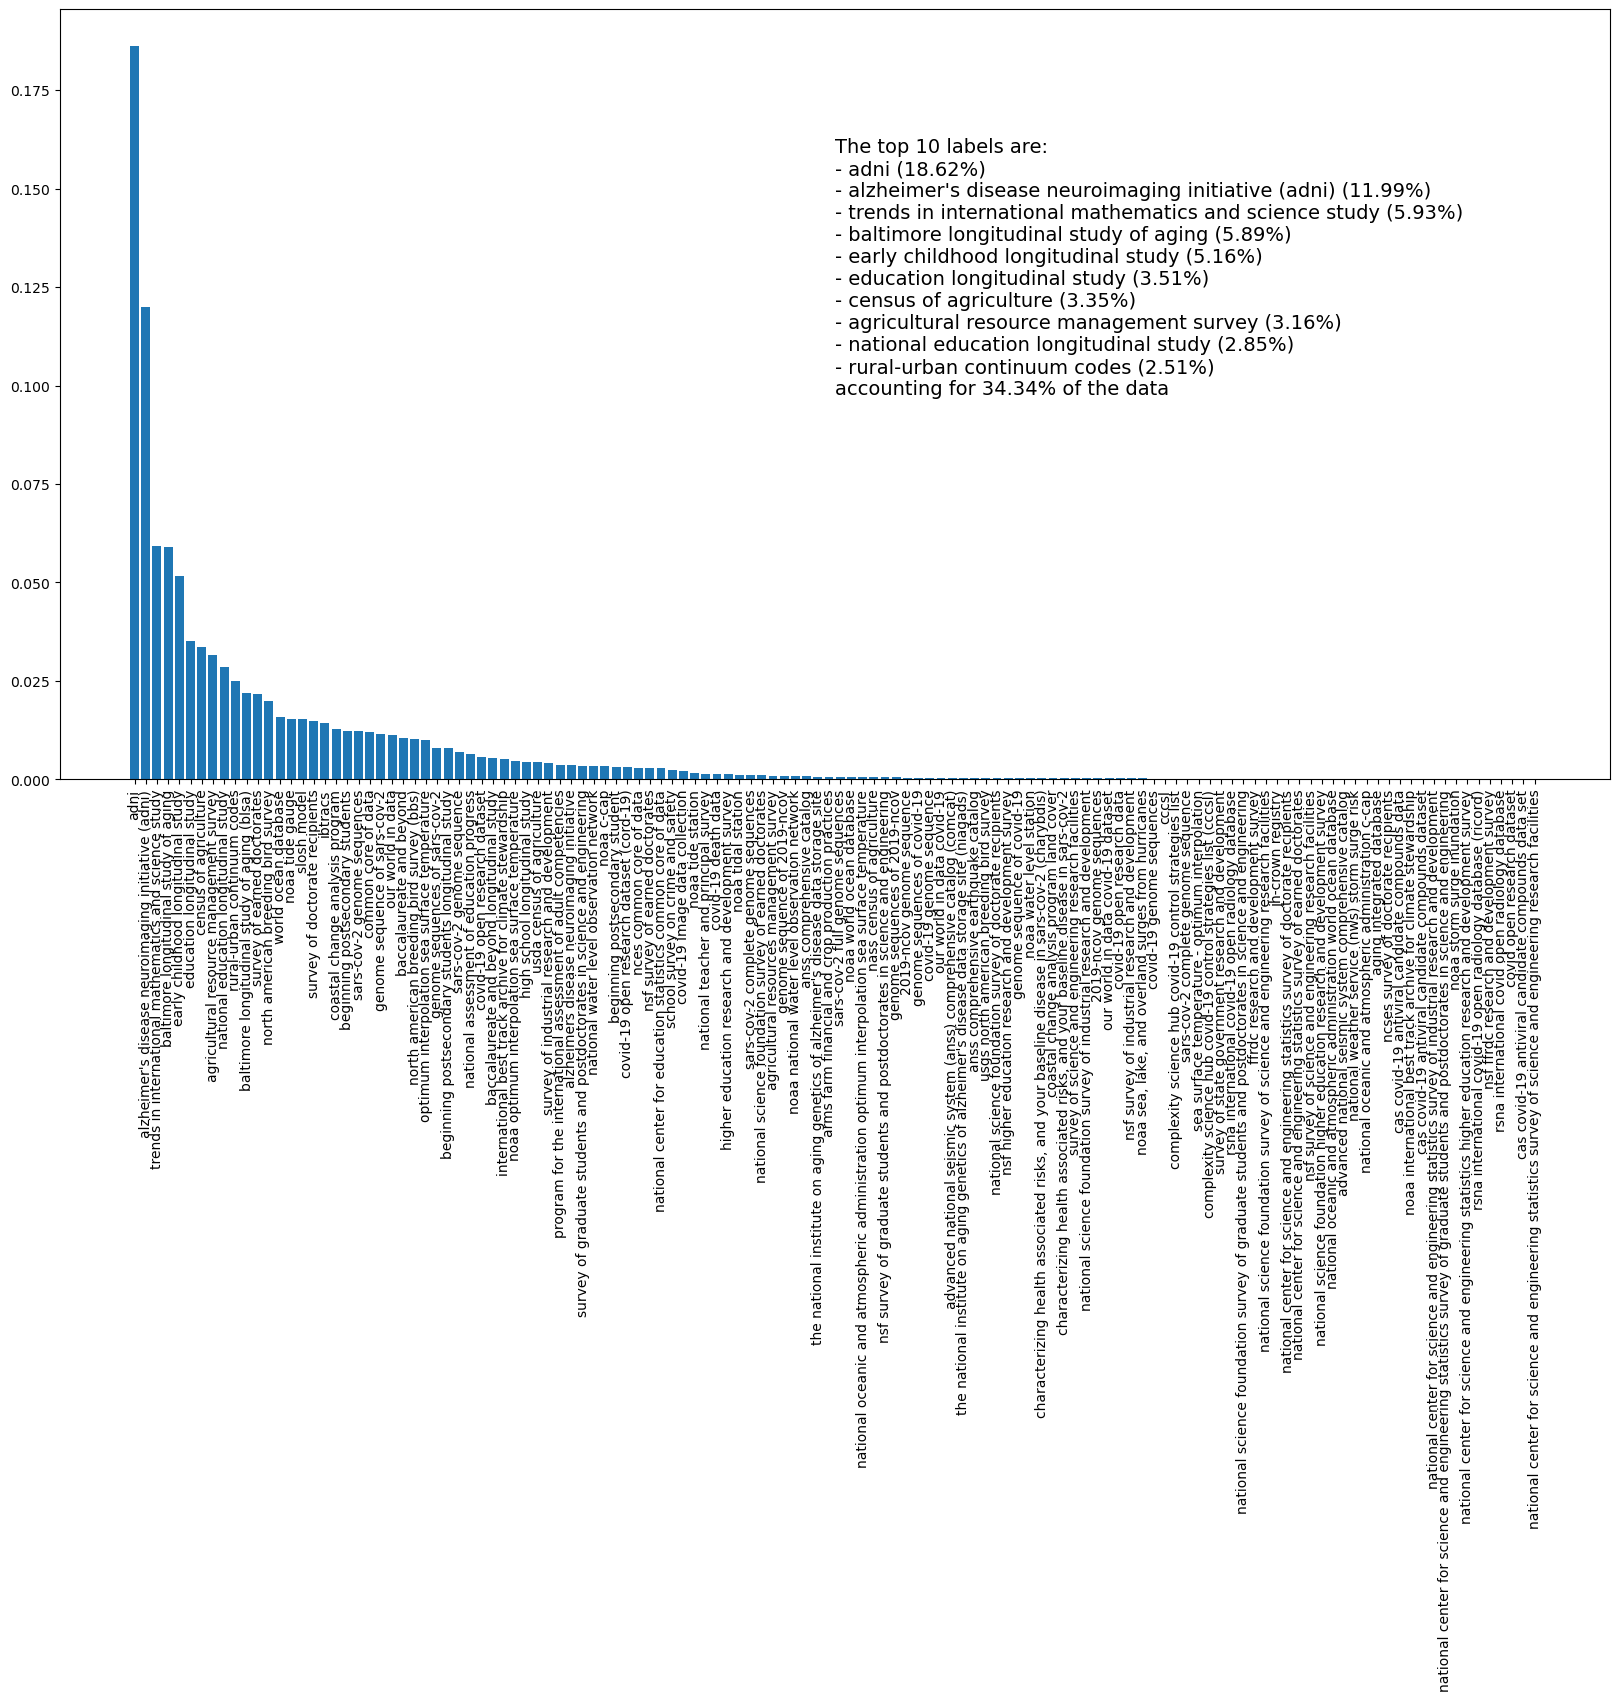

In [118]:
normalized_bar_chart(train_labels)

/tmp/ipykernel_32403/1913195447.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(ids[idxs], rotation=90)


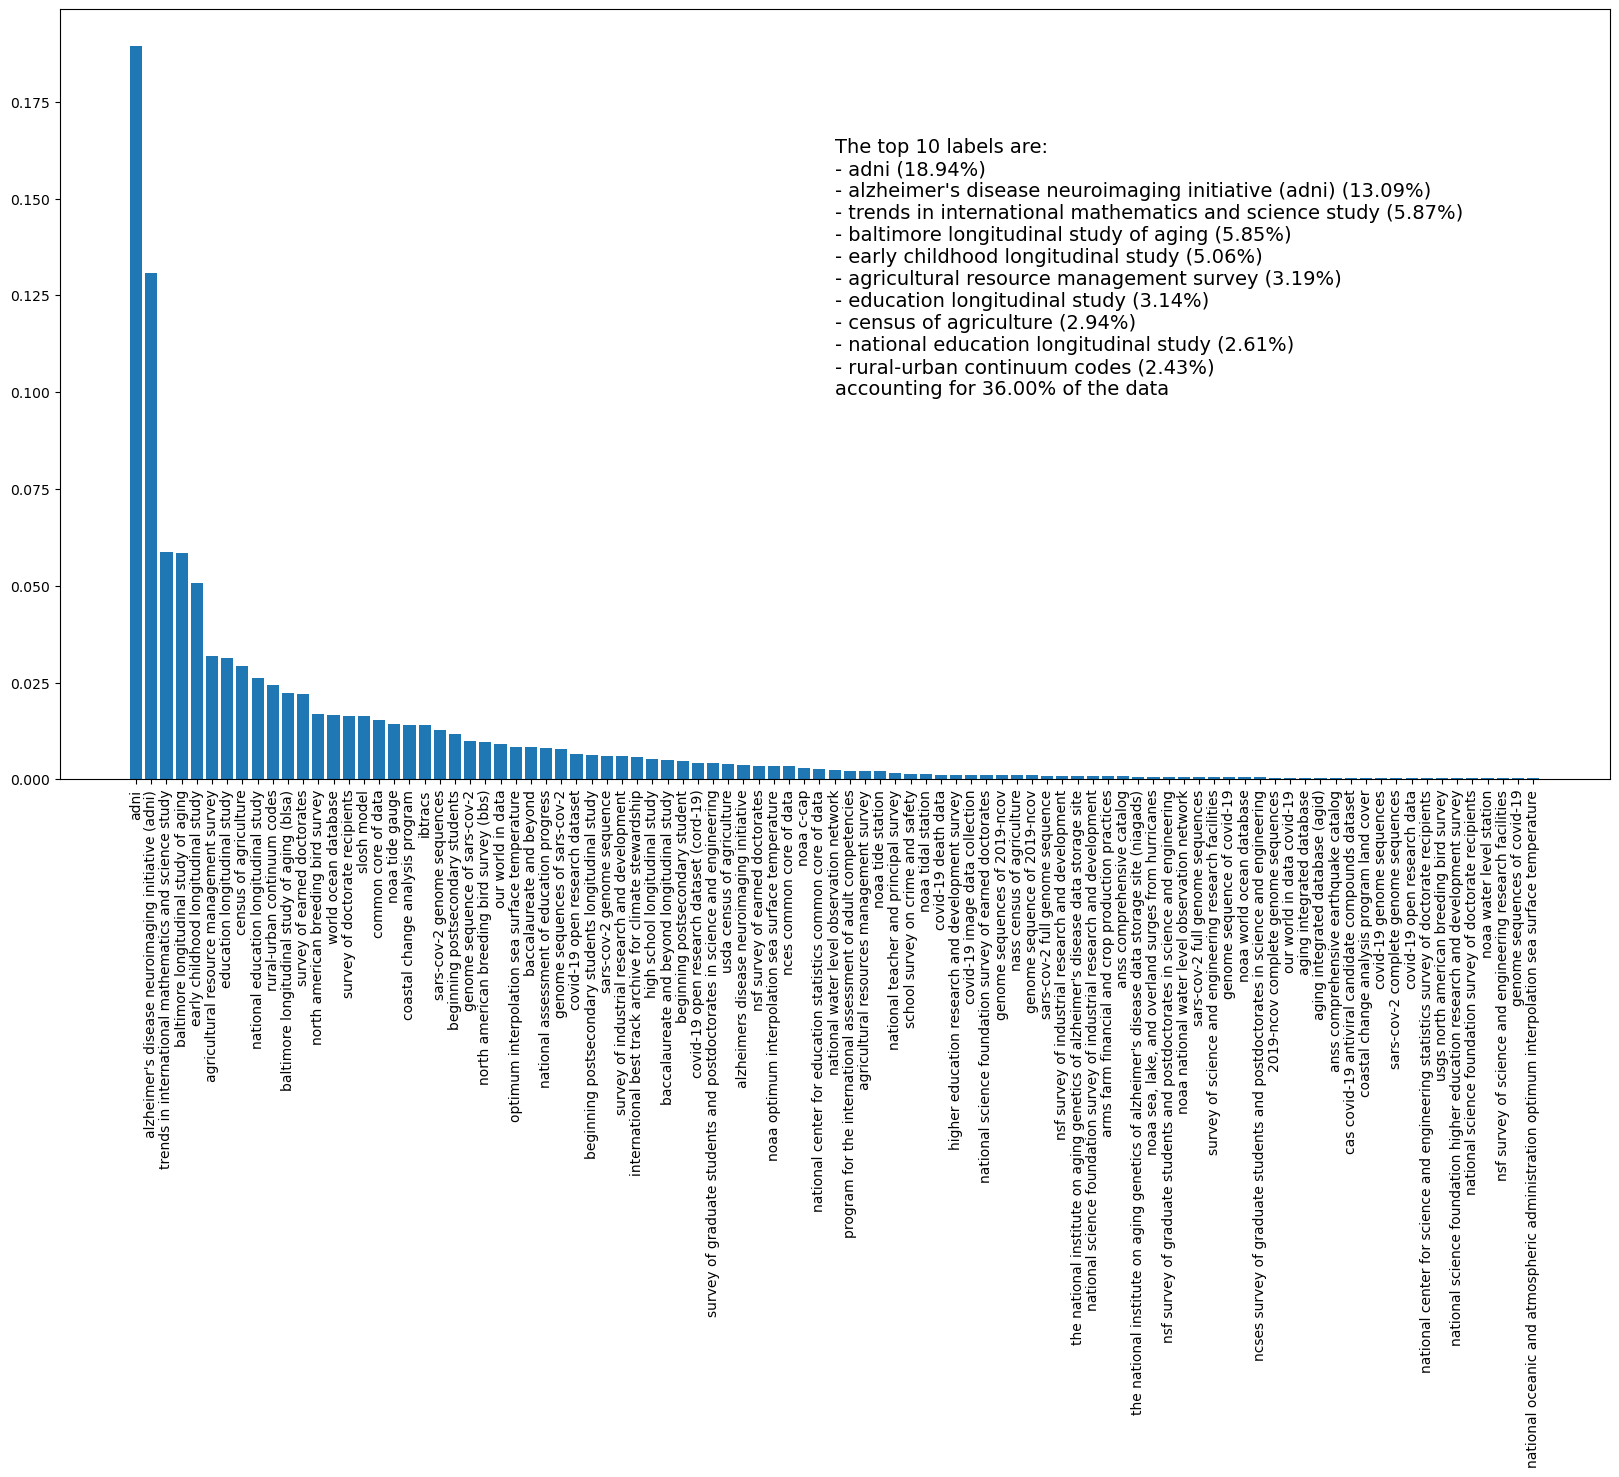

In [119]:
normalized_bar_chart(test_labels)

The distributions seem to be close enough to use, though the distribution has 
a long tail

| dataset | train% | test% |
----------|--------|-------|
|adni | 18.62 | 18.94 |
|alzheimer's disease neuroimaging initiative (adni) | 18.62 | 13.09|
|baltimore longitudinal study of aging | 11.99 | 5.87 |
|early childhood longitudinal study | 5.16 | 5.06 |
|education longitudinal study | 3.51 | 3.14 |
|census of agriculture | 3.35 | 2.94 |
|national education longitudinal study | 2.85 | 2.61 |
| rural-urban continuum codes | 2.51 | 2.43 | 

